In [1]:
!pip install numpy
!pip install scipy
!pip install matplotlib

import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 20.2 MB 267 kB/s eta 0:00:01    |██▋                             | 1.6 MB 3.3 MB/s eta 0:00:06     |█████                           | 3.1 MB 3.3 MB/s eta 0:00:06
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 26.1 MB 3.5 MB/s eta 0:00:01     |████████████████▏               | 13.2 MB 3.5 MB/s eta 0:00:04
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 12.4 MB 3.5 MB/s eta 0:00:01
     |███████████████████████████████

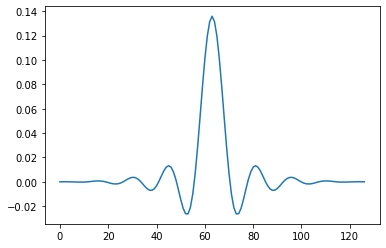

In [9]:
# Lets make a filter
fs = 2000
coeffs = signal.firls(127, [0, 100, 170, 1000],[1,1, 0.0003, 0.0003],fs=fs)

plt.plot(coeffs);


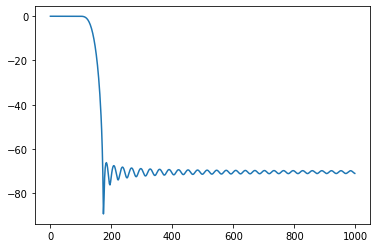

In [10]:
freq,response = signal.freqz(coeffs)
plt.plot(0.5*fs*freq/np.pi, 20*np.log10(np.absolute(response)));

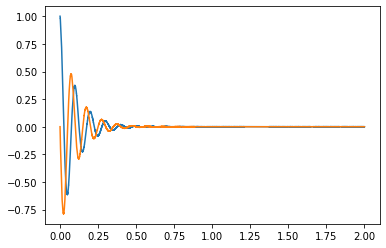

In [39]:
# Lets generate a signal
dwell = 20e-6 #[s]
tau = 0.1 #[s]
w = 10*2*np.pi #[Hz]
noise = 0.001

times = np.linspace(0,2,np.int(1/dwell))
signal = np.exp(-1j*w*times)*np.exp(-times/tau) + 1j*noise*np.random.random(len(times)) + noise*np.random.random(len(times))
plt.plot(times, np.real(signal));
plt.plot(times, np.imag(signal));

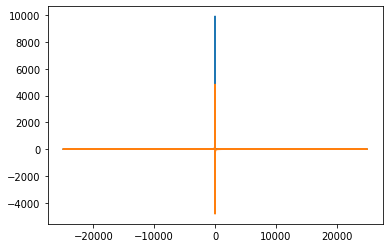

In [31]:
# Lets do the FT of the signal

signal_ft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(signal), dwell)
plt.plot(freqs,np.real(signal_ft));
plt.plot(freqs,np.imag(signal_ft));
plt.axes()